### 결정트리

#### 결정트리 Graphviz

In [1]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import warnings
warnings.filterwarnings("ignore")

In [2]:
dt_clf = DecisionTreeClassifier(random_state=156)

In [3]:
iris_data = load_iris()
X_train,X_test,y_train,y_test = train_test_split(iris_data.data,iris_data.target,test_size=0.2,random_state=11)

dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=156, splitter='best')

사이컷런의 결정 트리 알고리즘을 구현한 DecisionTreeClassifer를 제공해 결정 트리 모델의 학습과 예측을 수행할 수 있습니다.

In [4]:
from sklearn.tree import export_graphviz

export_graphviz(dt_clf, out_file='tree.dot',class_names=iris_data.target_names,feature_names = iris_data.feature_names,impurity=True, filled=True)

In [5]:
import graphviz

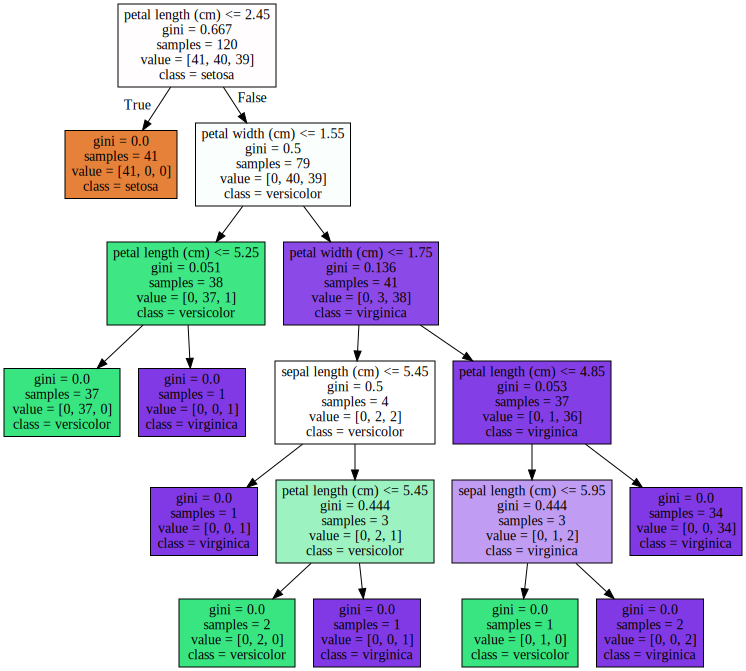

In [6]:
with open('tree.dot') as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

* petal length <= 2.45와 같이 피처의 조건이 있는 것은 자식 노드를 만들기 위한 규칙 조건으로,  
없으면 리프노드 입니다.    
* gini : value = []로 주어진 데이터 분포에서의 지니 계수입니다.  
* samples : 현 규칙에 해당하는 데이터 건수입니다.  
* value = [ ]는 클래스 값 기반의 데이터 건수입니다. 붓꽃 데이터 세트는 클래스 값으로 0,1,2를 가지며  
0 : setosa, 1 : versicolor, 2 : virginica으로, 만일 value = [ 41, 40, 39 ]라면 클래스 값의 순서로   
각각 데이터가 41개, 40개, 39개로 구성되있는 것을 의미합니다.

* setosa, versicolor, virginica는 각각 주황색, 초록색, 보라색을 나타내며, 색깔이 짙어질수록 지니 계수가 낮고 해당 레이블에 속하는 샘플 데이터가 많다는 의미입니다. 

* Graphviz를 이용한 결정 트리 알고리즘 규칙 생성 트리를 시각적으로 살펴보면 4번 노드에서 virginica가 1개가 존재해 완벽하기 구분하기 위해서 트리 노드를 계속해서 만들어가는데 이로 인해 매우 복잡한 규칙 트리가 만들어질 수 있으며 모델이 쉽게 과적합되는 문제가 발생할 수 있습니다.  
때문에 결정 트리 알고리즘에서 복잡한 트리가 생성되는 것을 막기 위해 하이퍼 파라미터를 사용 합니다.

하이퍼 파라미터
 - max_depth : 결정 트리의 최대 트리 깊이를 제어
 - min_samples_split : 자식 규칙 노드를 분할해 만들기 위한 최소한의 샘플 데이터 갯수
 - min_samples_leaf : 리프 노드가 될 수 있는 샘플 데이터 건수의 최솟값을 지정.

Feature importances:
{0} [0.025 0.    0.555 0.42 ]
sepal length (cm) : 0.025
sepal width (cm) : 0.000
petal length (cm) : 0.555
petal width (cm) : 0.420


<AxesSubplot:>

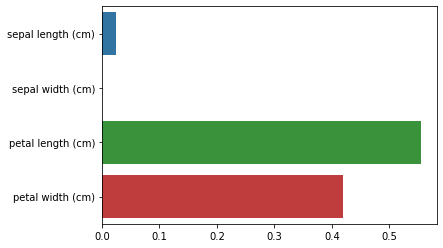

In [7]:
import seaborn as sns
import numpy as np
%matplotlib inline

print('Feature importances:\n{0}',format(np.round(dt_clf.feature_importances_,3)))
for name, value in zip(iris_data.feature_names, dt_clf.feature_importances_):
    print('{0} : {1:.3f}'.format(name, value))
    
sns.barplot(x=dt_clf.feature_importances_,y=iris_data.feature_names)

사이킷런은 결정 트리 알고리즘이 학습을 통해 규칙을 정하는데 있어 피처의 중요한 역할 지표를 DecisionTreeClassifier 객체의 feature_importances_ 속성으로 제공하며, 이는 ndarray 형태로 값을 반환하며 피처 순서대로 값이 할당됩니다.  
값이 높을수록 해당 피처의 중요도가 높다는 의미입니다.

#### 결정 트리 과적합

In [8]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
%matplotlib inline

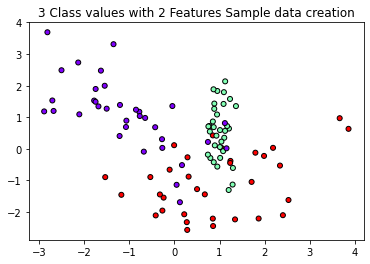

In [9]:
plt.title("3 Class values with 2 Features Sample data creation")

X_features, y_labels = make_classification(n_features=2,n_redundant=0,n_informative=2,
                                          n_classes=3,n_clusters_per_class=1, random_state=0 )

plt.scatter(X_features[:, 0], X_features[:, 1], marker='o', c=y_labels, s=25, cmap='rainbow', edgecolor='k')

사이킷런은 분류를 위한 테스트용 데이터를 쉽게 만들 수 있도록 make_classification( ) 함수를 제공합니다.  
함수를 이용해 2개의 피처가 가지 유형의 클래스 값을 가지는 데이터 세트를 만들고 이를 그래프 형태로 시각화했습니다.

In [10]:
import numpy as np

# Classifier의 Decision Boundary를 시각화 하는 함수
def visualize_boundary(model, X, y):
    fig,ax = plt.subplots()
    
    # 학습 데이타 scatter plot으로 나타내기
    ax.scatter(X[:, 0], X[:, 1], c=y, s=25, cmap='rainbow', edgecolor='k',
               clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim_start , xlim_end = ax.get_xlim()
    ylim_start , ylim_end = ax.get_ylim()
    
    model.fit(X, y)
    # meshgrid 형태인 모든 좌표값으로 예측 수행. 
    xx, yy = np.meshgrid(np.linspace(xlim_start,xlim_end, num=200),np.linspace(ylim_start,ylim_end, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    
    # contourf() 를 이용하여 class boundary 를 visualization 수행. 
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap='rainbow', clim=(y.min(), y.max()),
                           zorder=1)

해당 함수는 머신러닝 모델이 클래스 값을 예측하는 결정 기준을 색상과 경계로 나타내 모델이 어떻게 데이터 세트를 예측 분류하는지 보여줍니다.

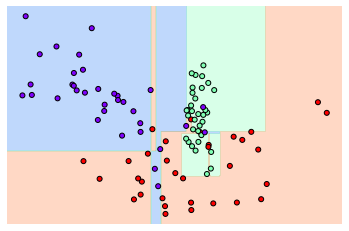

In [11]:
from sklearn.tree import DecisionTreeClassifier

dt_clf = DecisionTreeClassifier().fit(X_features,y_labels)
visualize_boundary(dt_clf,X_features,y_labels)

결정 트리의 기본 하이퍼 파라미터 설정은 리프 노드 안에 데이터가 모두 균일하거나 하나만 존재해야 하는 분할 기준으로 인해 결정 기준 경계가 많아져 복잡해졌으며, 이로 인해 예측 정확도가 떨어지게 됩니다.

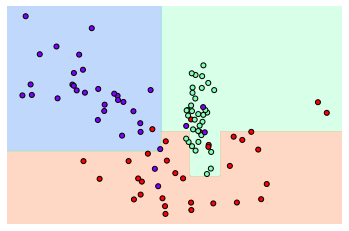

In [12]:
dt_clf = DecisionTreeClassifier(min_samples_leaf=5).fit(X_features,y_labels)
visualize_boundary(dt_clf,X_features,y_labels)

min_samples_leaf = 6을 설정해 6개 이하의 데이터는 리프 노드를 생성할 수 있도록 리프 노드 생성 규칙을 완화한 결과, 이상치에 크게 반응하지 않으면서 일반화된 분류 규칙에 따라 분류됐음을 알 수 있습니다.

#### 앙상블 
여러 명의 전문가로 위원회를 구성해 다양한 의견을 수렴하여 결정하듯이 앙상블 학습의 목표는 다양한 분류기의 예측 결과를 결합함으로써 신뢰성이 높은 예측값을 얻는 것입니다.

##### 보팅


In [13]:
import pandas as pd

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.ensemble import VotingClassifier
from sklearn.neighbors import KNeighborsClassifier

cancer = load_breast_cancer()

data_df = pd.DataFrame(data=cancer.data, columns=cancer.feature_names)
data_df.head(3)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758


사이킷런의 내장 데이터 세트 위스콘신 유방암 데이터 세트를 불러와 데이터프레임으로 변환했습니다.

In [14]:
lf_clf = LogisticRegression()
knn_clf = KNeighborsClassifier()

vo_clf = VotingClassifier(estimators=[('lf',lf_clf),('knn',knn_clf)],voting='soft')

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, test_size=0.2, random_state=156)

vo_clf.fit(X_train,y_train)
pred = vo_clf.predict(X_test)
print('voting 분류기 정확도 : {0:.4f}'.format(accuracy_score(y_test,pred)))

classifiers = [ lf_clf, knn_clf]
for classifier in classifiers:
    classifier.fit(X_train,y_train)
    pred = classifier.predict(X_test)
    class_name = classifier.__class__.__name__
    print('{0} 정확도 : {1:.4f}'.format(class_name,accuracy_score(y_test,pred)))

voting 분류기 정확도 : 0.9561
LogisticRegression 정확도 : 0.9474
KNeighborsClassifier 정확도 : 0.9035


사이킷런은 VotingClassifier 클래스를 이용해 보팅 분류기를 생성할 수 있으며, 로지스틱 회귀와 KNN을 기반으로하여 소프트 보팅 방식으로 새롭게 보팅 분류기를 만들었습니다.  

VotingClassifier 클래스 주요 인자  
* estimators = 리스트 값으로 보팅에 사용될 여러 개의 Classifier 객체들을 튜플 형식으로 입력 받습니다.
* voting = 하드 보팅은 'hard', 소프트 보팅에는 'soft'를 입력받으며, 하드 소프트보팅이 정확도가 높습니다.

##### 배깅 
배깅은 같은 알고리즘으로 여러 개의 분류기를 만들어서 보팅으로 최종 결정하는 알고리즘으로 대표적인 알고리즘이 랜덤포레스트이며, 랜덤 포레스트는 결정 트리 기반으로 결정트리의 쉽고 직관적인장점을 그대로 가지고 있습니다.

###### 랜덤 포레스트
랜덤 포레스트는 여러 개의 결정 트리 분류기가 전체 데이터에서 배깅방식으로 각자의 데이터를 샘플링해 개별적으로 학습을 수행한 뒤 최종적으로 모든 분류기가 보팅을 통해 예측 결정을 합니다.

In [15]:
import pandas as pd

def get_new_feature_name_df(old_feature_name_df):
    feature_dup_df = pd.DataFrame(data=old_feature_name_df.groupby('column_name').cumcount(), columns=['dup_cnt'])
    feature_dup_df = feature_dup_df.reset_index()
    new_feature_name_df = pd.merge(old_feature_name_df.reset_index(), feature_dup_df, how='outer')
    new_feature_name_df['column_name'] = new_feature_name_df[['column_name', 'dup_cnt']].apply(lambda x : x[0]+'_'+str(x[1]) 
                                                                                           if x[1] >0 else x[0] ,  axis=1)
    new_feature_name_df = new_feature_name_df.drop(['index'], axis=1)
    return new_feature_name_df

원본 데이터에 중복된 Feature 명으로 인해 duplicate name에러가 발생하여 중복 feature명에 대해 원본 feature명에 '_1(또는2)'를 추가로 부여하는 함수인 get_new_feature_name_df( ) 생성했습니다.

In [16]:
import pandas as pd

def get_human_dataset( ):
    
    feature_name_df = pd.read_csv('features.txt',sep='\s+',
                        header=None,names=['column_index','column_name'])
    
    new_feature_name_df = get_new_feature_name_df(feature_name_df)
    
    feature_name = new_feature_name_df.iloc[:, 1].values.tolist()
    
    X_train = pd.read_csv('X_train.txt',sep='\s+', names=feature_name )
    X_test = pd.read_csv('X_test.txt',sep='\s+', names=feature_name)
    
    y_train = pd.read_csv('y_train.txt',sep='\s+',header=None,names=['action'])
    y_test = pd.read_csv('y_test.txt',sep='\s+',header=None,names=['action'])
    
    return X_train, X_test, y_train, y_test


X_train, X_test, y_train, y_test = get_human_dataset()

학습 피처 데이터 셋과 테스트 피처 데이터을 DataFrame으로 로딩. 컬럼명은 feature_name 적용하였고,  
학습 레이블과 테스트 레이블 데이터을 DataFrame으로 로딩하고 컬럼명은 action으로 부여하여  
로드된 학습/테스트용 데이터프레임을 모두 반환하였습니다.



In [17]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

X_train, X_test, y_train, y_test = get_human_dataset()

rf_clf = RandomForestClassifier(random_state=0)
rf_clf.fit(X_train , y_train)
pred = rf_clf.predict(X_test)
accuracy = accuracy_score(y_test , pred)
print('랜덤 포레스트 정확도: {0:.4f}'.format(accuracy))

랜덤 포레스트 정확도: 0.9108


결정 트리에서 사용한 get_human_dataset( )을 이용해 학습/테스트용 DataFrame 반환하여 랜덤 포레스트 학습 및 별도의 테스트 셋으로 예측 성능 평가해보았습니다.

In [18]:
from sklearn.model_selection import GridSearchCV

params = {
    'n_estimators':[100],
    'max_depth' : [6, 8, 10, 12], 
    'min_samples_leaf' : [8, 12, 18 ],
    'min_samples_split' : [8, 16, 20]
}
# RandomForestClassifier 객체 생성 후 GridSearchCV 수행
rf_clf = RandomForestClassifier(random_state=0, n_jobs=-1)
grid_cv = GridSearchCV(rf_clf , param_grid=params , cv=2, n_jobs=-1 )
grid_cv.fit(X_train , y_train)

print('최적 하이퍼 파라미터:\n', grid_cv.best_params_)
print('최고 예측 정확도: {0:.4f}'.format(grid_cv.best_score_))

최적 하이퍼 파라미터:
 {'max_depth': 10, 'min_samples_leaf': 8, 'min_samples_split': 8, 'n_estimators': 100}
최고 예측 정확도: 0.9166


GridSearchCV를 이용해 랜덤 포레스트의 하이퍼 파라미터를 튜닝해보았습니다. 데이터 세트는 사용자 행동 데이터 세트를 이용했습니다.

In [19]:
rf_clf1 = RandomForestClassifier(n_estimators=300, max_depth=10, min_samples_leaf=8, \
                                 min_samples_split=8, random_state=0)
rf_clf1.fit(X_train , y_train)
pred = rf_clf1.predict(X_test)
print('예측 정확도: {0:.4f}'.format(accuracy_score(y_test , pred)))

예측 정확도: 0.9165


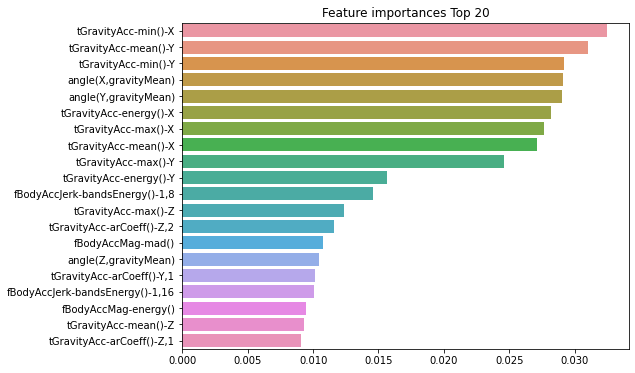

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

ftr_importances_values = rf_clf1.feature_importances_
ftr_importances = pd.Series(ftr_importances_values,index=X_train.columns  )
ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]

plt.figure(figsize=(8,6))
plt.title('Feature importances Top 20')
sns.barplot(x=ftr_top20 , y = ftr_top20.index)
plt.show()

#### Boosting Machine
여러 개의 약한 학습기를 순차적으로 학습-예측하면서 잘못 예측한 데이터에 가중치 부여를 통해 오류를 개선해 나가면서 학습하는 방식입니다.

##### GBM ( gradient Boost Machine )
오류 데이터에 가중치를 부여하는 방식이며, 가중치 업데이트를 경사 하강법을 이용합니다.  
( 실제 값 - 예측 값을 최소화하는 방향성을 가지고 반복적으로 가중치 값을 업데이트하는 것이 경사 하강법. )

In [22]:
from sklearn.ensemble import GradientBoostingClassifier
import time
import warnings 
warnings.filterwarnings('ignore')

X_train, X_test, y_train, y_test = get_human_dataset()

start_time = time.time()

gb_clf = GradientBoostingClassifier(random_state=0)
gb_clf.fit(X_train, y_train)
pred = gb_clf.predict(X_test)
print("GBM 정확도: {0:.4f}".format(accuracy_score(y_test,pred)))
print("GBM 수행 시간: {0:.1f} 초 ".format(time.time() - start_time))


GBM 정확도: 0.9386
GBM 수행 시간: 124.5 초 


기본 하이퍼 파라미터만으로 랜덤 포레스트보다 나은 예측 성능을 나타냈습니다. 일반적으로 GBM이 랜덤 포레스트보다 예측 성능이 우수하지만 수행 시간이 오래 걸리며, 하이퍼 파라미터 튜닝 노력도 더 필요하는 점이 단점입니다.

In [23]:
from sklearn.model_selection import GridSearchCV

params = {
    'n_estimators':[100, 500],
    'learning_rate' : [ 0.05, 0.1]
}
grid_cv = GridSearchCV(gb_clf, param_grid=params, cv=2, verbose=1)
grid_cv.fit(X_train,y_train)

print('최적 하이퍼 파라미터:\n', grid_cv.best_params_)
print('최고 예측 정확도: {0:.4f}'.format(grid_cv.best_score_))

Fitting 2 folds for each of 4 candidates, totalling 8 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed: 12.8min finished


최적 하이퍼 파라미터:
 {'learning_rate': 0.05, 'n_estimators': 500}
최고 예측 정확도: 0.9014


하이퍼 파라미터
* learning_rate : GBM이 학습을 진행할 때마다 적용하는 학습률, 0~1 사이의 값을 지정하며 기본값은 0.1  
너무 작은 값을 적용할 시 성능은 높아지지만 수행 시간이 오래 걸리는 단점이 존재
* n_estimators : weak learner의 개수, 기본값은 100, 순차적으로 오류를 보정하므로 개수가 많을수록 예측 성능이 좋아지지만 수행시간이 오래걸리는 단점 존재
* subsample : weak learner가 학습에 사용하는 데이터의 샘플링 비율


하이퍼 파라미터를 설정한 결과 최적 하이퍼 파라미터와 최고 예측 정확도가 나왔지만, PC에서 30분정도의 시간이 걸렸습니다.

In [25]:
gd_pred = grid_cv.best_estimator_.predict(X_test)
print('GBM 정확도 : {0:.4f}'.format(accuracy_score(y_test,gd_pred)))

GBM 정확도 : 0.9396


테스트 데이터 세트에서 약 94.1%의 정확도가 나왔습니다.  
GBM은 뛰어난 예측 성능을 가졌지만 수행 시간이 오래 걸린다는 단점이 있습니다.

#### XGBoost
GBM에 기반하고 있으며, GBM의 단점이였던 느린 수행 시간 및 과적합 규제 부재등의 문제를 해결해서 다른 머신러닝 기법보다 뒤어난 예측 성능을 나타냅니다.

XGBoost 장점
* 뛰어난 예측 성능
* 결손값 자체 처리 
* 과적합 규제
* 빠른 수행 시간  
: 순차적으로 Weak learner가 가중치를 증감하는 방식의 GBM과 달리 병렬수행으로 빠른 수행 성능 보장
* 나무 가지치기  
: max_depth 파라미터로 분할 깊이를 조정하지만 나무 가지치기로 분할 수를 줄임
* 자체 내장된 교차 검증  
: 학습, 평가 데이터세트에 대한 교차 검증으로 최적화된 반복 수행 횟수를 가지며,   
  최적화되면 조기 중단되는 기능이 있습니다.
